<a href="https://colab.research.google.com/github/varshini0317/Mini-Project/blob/main/Weather%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.6 MB/s eta 0:00:00


In [452]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [368]:
# Load the datasset
df= pd.read_csv('/content/dataset.csv')

STATISTICAL ANALYSIS

In [369]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [371]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [372]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [373]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [374]:
df.index

RangeIndex(start=0, stop=1461, step=1)

In [375]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [376]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [377]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [378]:
df.count()

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

In [379]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [380]:
# Create an empty dictionary to store the statistics for each column
stats_dict = {
    'mean': {},
    'median': {},
    'mode': {},
    'std_dev': {},
    'variance': {}
}

In [381]:
# Loop through the columns of the DataFrame
for col in df.columns:
    if df[col].dtype == float:
        data_col = df[col]
        stats_dict['mean'][col] = np.mean(data_col)
        stats_dict['median'][col] = statistics.median(data_col)
        stats_dict['mode'][col] = statistics.mode(data_col)
        stats_dict['std_dev'][col] = np.std(data_col)
        stats_dict['variance'][col] = np.var(data_col)

In [382]:
#mean value of each column against each 'Weather Condition'
df.groupby('weather').mean(numeric_only=True)

,precipitation,temp_max,temp_min,wind
weather,,,,
drizzle,0.000000,15.926415,7.111321,2.367925
fog,0.000000,16.757426,7.979208,2.481188
rain,6.557878,13.454602,7.588768,3.669891
snow,8.553846,5.573077,0.146154,4.411538
sun,0.000000,19.861875,9.343750,2.956406


In [383]:
# Print the stats_dict dictionary
print(stats_dict)

{'mean': {'precipitation': 3.02943189596167, 'temp_max': 16.43908281998631, 'temp_min': 8.234770704996578, 'wind': 3.24113620807666}, 'median': {'precipitation': 0.0, 'temp_max': 15.6, 'temp_min': 8.3, 'wind': 3.0}, 'mode': {'precipitation': 0.0, 'temp_max': 11.1, 'temp_min': 6.1, 'wind': 2.6}, 'std_dev': {'precipitation': 6.677907759070508, 'temp_max': 7.347242349178532, 'temp_min': 5.021284856214179, 'wind': 1.4373329058364552}, 'variance': {'precipitation': 44.5944520386541, 'temp_max': 53.98197013756248, 'temp_min': 25.213301607245846, 'wind': 2.0659258822002684}}


In [384]:
#value_counts()
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

Analysis 1: Number of times when the weather is raining

In [385]:
#filtering
df[df.weather=='rain']

,date,precipitation,temp_max,temp_min,wind,weather
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...,...
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain
1454,2015-12-25,5.8,5.0,2.2,1.5,rain
1456,2015-12-27,8.6,4.4,1.7,2.9,rain


In [386]:
#groupby()
df.groupby('weather').get_group('rain')

,date,precipitation,temp_max,temp_min,wind,weather
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...,...
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain
1454,2015-12-25,5.8,5.0,2.2,1.5,rain
1456,2015-12-27,8.6,4.4,1.7,2.9,rain


Analysis 2: Number of times when the weather is sunny

In [387]:
#filtering
df[df.weather=='sun']

,date,precipitation,temp_max,temp_min,wind,weather
7,2012-01-08,0.0,10.0,2.8,2.0,sun
10,2012-01-11,0.0,6.1,-1.1,5.1,sun
11,2012-01-12,0.0,6.1,-1.7,1.9,sun
12,2012-01-13,0.0,5.0,-2.8,1.3,sun
32,2012-02-02,0.0,8.3,1.7,2.6,sun
...,...,...,...,...,...,...
1427,2015-11-28,0.0,7.2,-2.7,1.0,sun
1443,2015-12-14,0.0,7.8,1.7,1.7,sun
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [388]:
#groupby()
df.groupby('weather').get_group('sun')

,date,precipitation,temp_max,temp_min,wind,weather
7,2012-01-08,0.0,10.0,2.8,2.0,sun
10,2012-01-11,0.0,6.1,-1.1,5.1,sun
11,2012-01-12,0.0,6.1,-1.7,1.9,sun
12,2012-01-13,0.0,5.0,-2.8,1.3,sun
32,2012-02-02,0.0,8.3,1.7,2.6,sun
...,...,...,...,...,...,...
1427,2015-11-28,0.0,7.2,-2.7,1.0,sun
1443,2015-12-14,0.0,7.8,1.7,1.7,sun
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Analysis 3: Number of times when the weather is drizzling

In [389]:
#filtering
df[df.weather=='drizzle']

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
26,2012-01-27,0.0,6.7,-2.2,1.4,drizzle
45,2012-02-15,0.0,7.2,0.6,1.8,drizzle
85,2012-03-26,0.0,12.8,6.1,4.3,drizzle
103,2012-04-13,0.0,15.0,3.9,4.0,drizzle
118,2012-04-28,0.0,16.1,8.3,2.5,drizzle
135,2012-05-15,0.0,24.4,9.4,4.1,drizzle
175,2012-06-24,0.0,19.4,9.4,2.0,drizzle
186,2012-07-05,0.0,24.4,10.6,3.1,drizzle
191,2012-07-10,0.0,23.9,11.1,2.3,drizzle


In [390]:

#groupby()
df.groupby('weather').get_group('drizzle')

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
26,2012-01-27,0.0,6.7,-2.2,1.4,drizzle
45,2012-02-15,0.0,7.2,0.6,1.8,drizzle
85,2012-03-26,0.0,12.8,6.1,4.3,drizzle
103,2012-04-13,0.0,15.0,3.9,4.0,drizzle
118,2012-04-28,0.0,16.1,8.3,2.5,drizzle
135,2012-05-15,0.0,24.4,9.4,4.1,drizzle
175,2012-06-24,0.0,19.4,9.4,2.0,drizzle
186,2012-07-05,0.0,24.4,10.6,3.1,drizzle
191,2012-07-10,0.0,23.9,11.1,2.3,drizzle


Analysis 4: Number of times when the weather is snowy

In [391]:
 #filtering
df[df.weather=='snow']

,date,precipitation,temp_max,temp_min,wind,weather
13,2012-01-14,4.1,4.4,0.6,5.3,snow
14,2012-01-15,5.3,1.1,-3.3,3.2,snow
15,2012-01-16,2.5,1.7,-2.8,5.0,snow
16,2012-01-17,8.1,3.3,0.0,5.6,snow
17,2012-01-18,19.8,0.0,-2.8,5.0,snow
18,2012-01-19,15.2,-1.1,-2.8,1.6,snow
19,2012-01-20,13.5,7.2,-1.1,2.3,snow
56,2012-02-26,1.3,5.0,-1.1,3.4,snow
58,2012-02-28,3.6,6.7,-0.6,4.2,snow
59,2012-02-29,0.8,5.0,1.1,7.0,snow


In [392]:
#groupby()
df.groupby('weather').get_group('snow')

,date,precipitation,temp_max,temp_min,wind,weather
13,2012-01-14,4.1,4.4,0.6,5.3,snow
14,2012-01-15,5.3,1.1,-3.3,3.2,snow
15,2012-01-16,2.5,1.7,-2.8,5.0,snow
16,2012-01-17,8.1,3.3,0.0,5.6,snow
17,2012-01-18,19.8,0.0,-2.8,5.0,snow
18,2012-01-19,15.2,-1.1,-2.8,1.6,snow
19,2012-01-20,13.5,7.2,-1.1,2.3,snow
56,2012-02-26,1.3,5.0,-1.1,3.4,snow
58,2012-02-28,3.6,6.7,-0.6,4.2,snow
59,2012-02-29,0.8,5.0,1.1,7.0,snow


DATA PREPARATION

In [393]:
df['date'] = pd.to_datetime(df['date'])

In [394]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek

df

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year,day_of_week
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012,6
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,1,2012,0
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,1,2012,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,1,2012,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,1,2012,3
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,27,12,2015,6
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,28,12,2015,0
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,29,12,2015,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,30,12,2015,2


Data Visualization

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

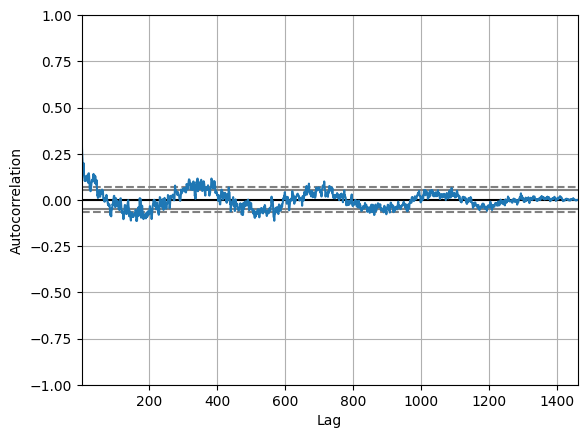

In [395]:
df1=df['weather'].value_counts().index[0]

# Plot the autocorrelation of the 'weather' column
pd.plotting.autocorrelation_plot(df['weather'] == df1)

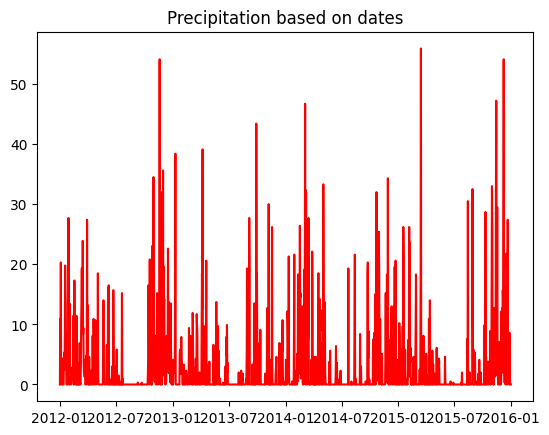

In [396]:
x=df['date']
y=df['precipitation']
plt.plot(x,y,'r')
plt.title('Precipitation based on dates')
plt.show()

Text(0.5, 1.0, 'Frequency of Weather Conditions')

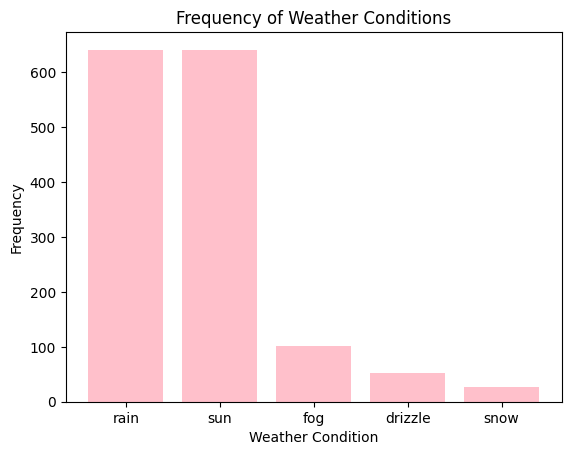

In [397]:
weather=df['weather'].value_counts()
plt.bar(weather.index, weather.values, color='pink')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Conditions')

Text(0.5, 1.0, 'DATE and WIND')

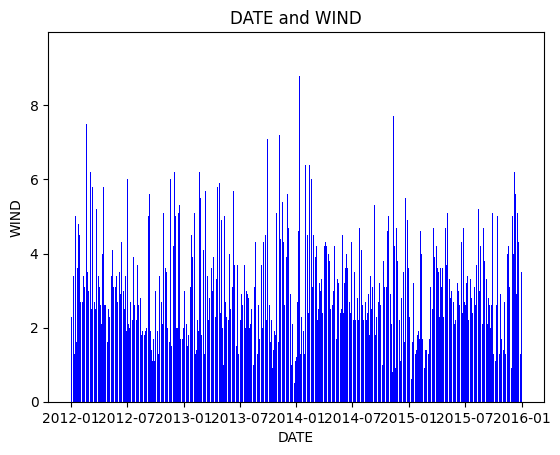

In [398]:
df['wind'].value_counts()
plt.bar(df['date'],df['wind'],color='blue')
plt.xlabel('DATE')
plt.ylabel('WIND')
plt.title('DATE and WIND')

Text(0.5, 1.0, 'Weather Condition Distribution')

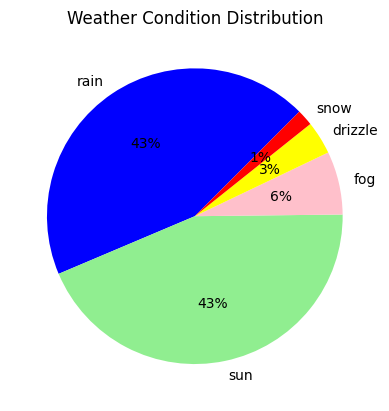

In [401]:
# Count the frequency of each weather condition
weather = df['weather'].value_counts()

# Plot the pie chart
plt.pie(weather, labels=weather.index, autopct='%d%%', startangle=45, colors=['blue', 'lightgreen','pink','yellow','red'])
plt.title('Weather Condition Distribution')

In [402]:
# Get the value counts of each unique value in the weather column
weather_counts = df['weather'].value_counts()

# Print the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(df)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")

Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


Text(0.1, 0.9, 'Pearson correlation: -0.23\np-value: 9.08e-19')

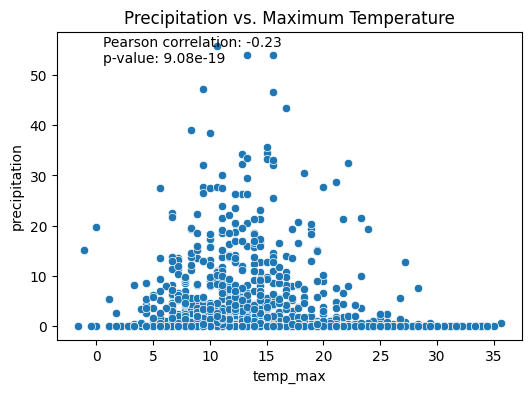

In [403]:
# Scatter plot of Precipitation vs. Maximum Temperature
plt.figure(figsize=(6, 4))
sns.scatterplot(x='temp_max', y='precipitation', data=df)
plt.title('Precipitation vs. Maximum Temperature')

# Calculate Pearson correlation coefficient and p-value
corr, p_val = stats.pearsonr(df['temp_max'], df['precipitation'])
plt.text(0.1, 0.9, 'Pearson correlation: {:.2f}\np-value: {:.2e}'.format(corr, p_val), transform=plt.gca().transAxes)

Text(0.1, 0.9, 'Pearson correlation: -0.16\np-value: 2.31e-10')

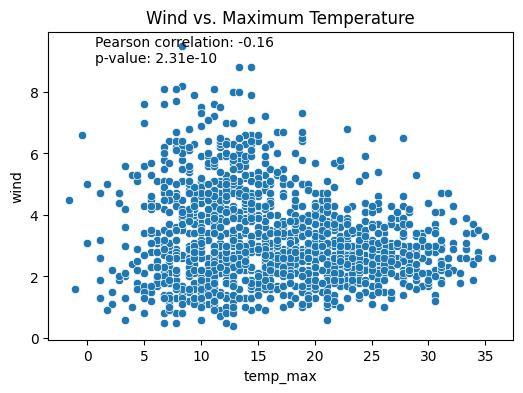

In [404]:
#Scatter plot of Wind vs. Maximum Temperature
plt.figure(figsize=(6, 4))
sns.scatterplot(x='temp_max', y='wind', data=df)
plt.title('Wind vs. Maximum Temperature')

# Calculate Pearson correlation coefficient and p-value
corr, p_val = stats.pearsonr(df['temp_max'], df['wind'])
plt.text(0.1, 0.9, 'Pearson correlation: {:.2f}\np-value: {:.2e}'.format(corr, p_val), transform=plt.gca().transAxes)


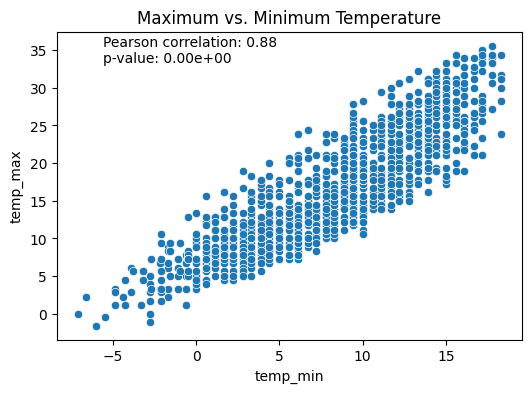

In [405]:
# Scatter plot of Maximum vs. Minimum Temperature
plt.figure(figsize=(6, 4))
sns.scatterplot(x='temp_min', y='temp_max', data=df)
plt.title('Maximum vs. Minimum Temperature')

# Calculate Pearson correlation coefficient and p-value
corr, p_val = stats.pearsonr(df['temp_min'], df['temp_max'])
plt.text(0.1, 0.9, 'Pearson correlation: {:.2f}\np-value: {:.2e}'.format(corr, p_val), transform=plt.gca().transAxes)

plt.show()

OUTLIER ANALYSIS

<ipython-input-406-4d795123ec40>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="precipitation", y="weather", data=df, palette="winter", ax=ax)


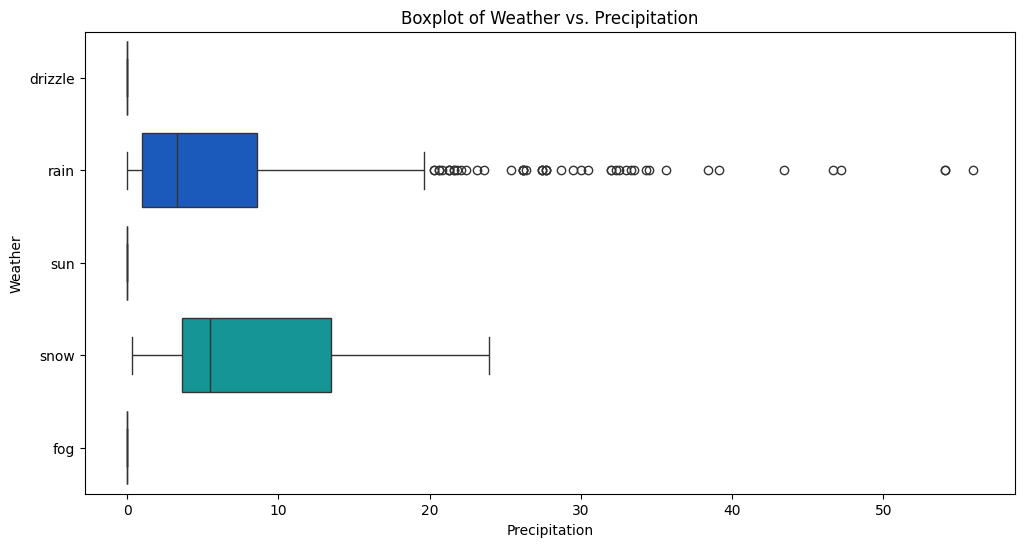

In [406]:
# Use a context manager to apply the default style to the plot
with plt.style.context('default'):

    # Create a figure with the specified size and an axis object
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot a boxplot with the given data, using the specified x and y variables, color palette, and axis object
    sns.boxplot(x="precipitation", y="weather", data=df, palette="winter", ax=ax)

    # Optional: set axis labels and title if desired
    ax.set(xlabel='Precipitation', ylabel='Weather', title='Boxplot of Weather vs. Precipitation')

<ipython-input-407-038e453366a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_max", y="weather", data=df, palette="spring", ax=ax)


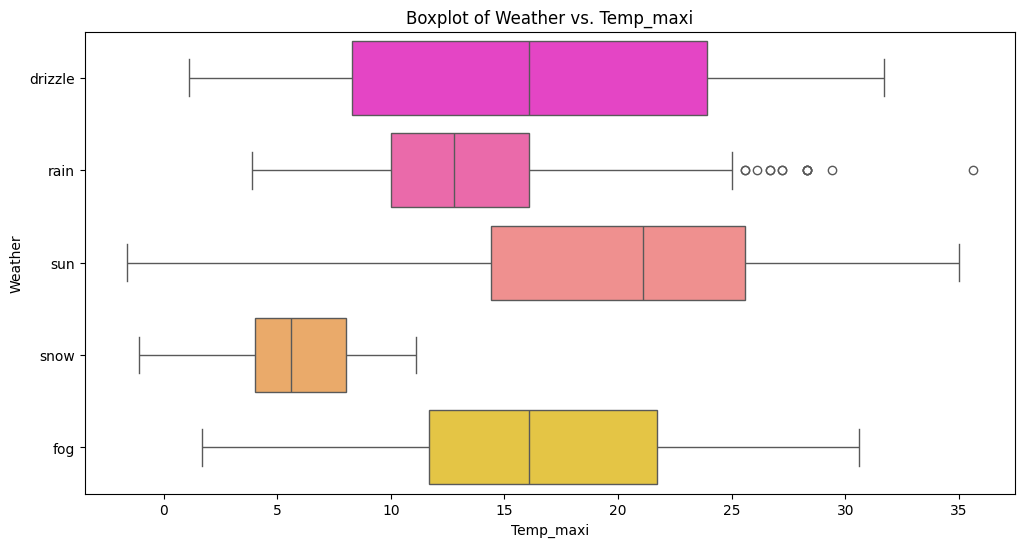

In [407]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_max", y="weather", data=df, palette="spring", ax=ax)
    ax.set(xlabel='Temp_maxi', ylabel='Weather', title='Boxplot of Weather vs. Temp_maxi')

<ipython-input-408-969aec8d2a56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_min", y="weather", data=df, palette="summer", ax=ax)


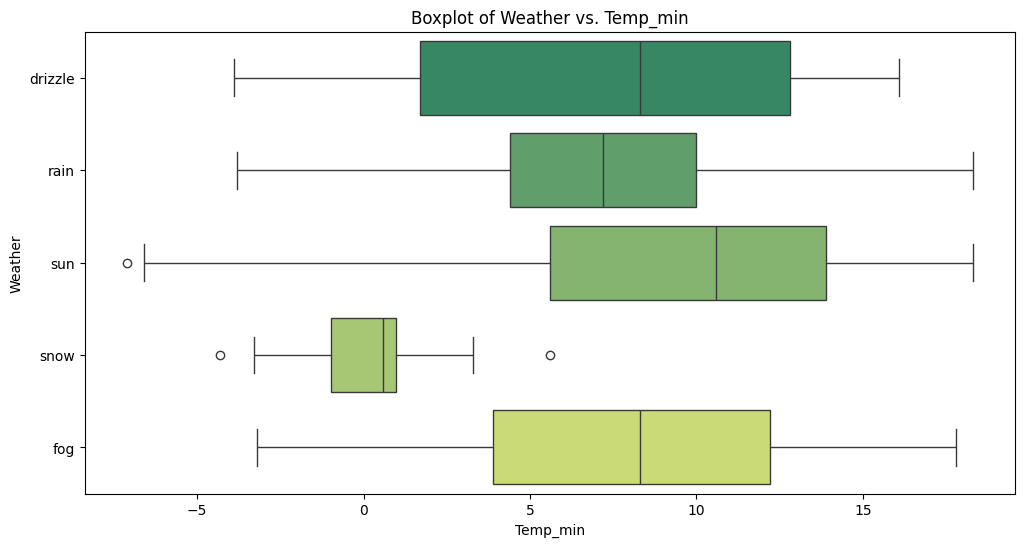

In [408]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_min", y="weather", data=df, palette="summer", ax=ax)
    ax.set(xlabel='Temp_min', ylabel='Weather', title='Boxplot of Weather vs. Temp_min')

<ipython-input-409-b4b9152480f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind", y="weather", data=df, palette="summer", ax=ax)


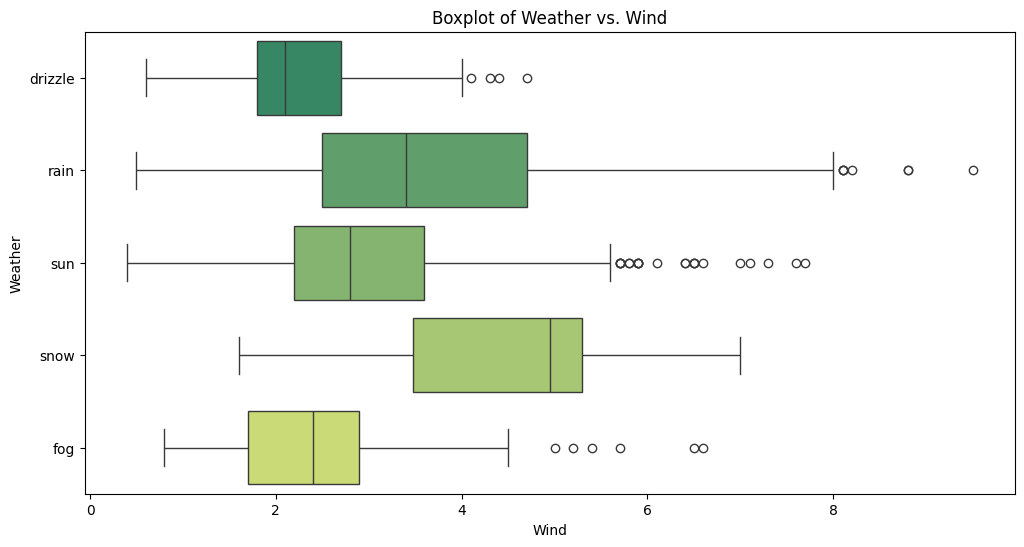

In [409]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="wind", y="weather", data=df, palette="summer", ax=ax)
    ax.set(xlabel='Wind', ylabel='Weather', title='Boxplot of Weather vs. Wind')

In [410]:
# Select only the numeric columns of the dataframe
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers using the IQR method
numeric_df = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Drop any remaining NA/NaN values
numeric_df = numeric_df.dropna()

# Update the original dataframe with the cleaned numeric columns
df.update(numeric_df)

DATA MODELLING & SELECTION

In [457]:
# Separate features and target
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

In [458]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [459]:
y_train = label_encoder.fit_transform(y_train)

In [460]:

# Initialize the model (CatBoostClassifier with appropriate parameters)
model1 = RandomForestClassifier()
model2 = SVC()
model3 = MLPClassifier()
#model = VotingClassifier(estimators=[('dt', model1), ('svc', model2), ('lr', model3),('gr',model4)])

In [467]:
# Combine the models in a VotingClassifier ensemble
model = VotingClassifier(estimators=[('dt', model1), ('svc', model2), ('mlp', model3)])

In [468]:
# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('dt', RandomForestClassifier()), ('svc', SVC()),
                             ('mlp', MLPClassifier())])

In [469]:

# Make predictions
predictions = model.predict(X_test)

In [470]:
# Evaluate the model
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)

Accuracy: 0.8225255972696246
